In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/Users/navo/Downloads/2017-2019 IFSC Mens Boulder Results - Sheet1.csv')
df.head()

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z 7 6,4T4Z 10 9,4T4Z 10 9
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z 7 6,3T4Z 3 4,3T3Z 7 6
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z 8 8,3T4Z 12 12,2T3Z 6 7
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z 7 7,2T4Z 3 11,1T3Z 3 5
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z 10 9,2T4Z 5 9,1T3Z 3 8


In [5]:
df1 = df

In [9]:
df1['LocYear'] = df1['Location'].astype(str) + ' ' + df1['Year'].astype(str)
df1.head()

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z 7 6,4T4Z 10 9,4T4Z 10 9,Meiringen 2019
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z 7 6,3T4Z 3 4,3T3Z 7 6,Meiringen 2019
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z 8 8,3T4Z 12 12,2T3Z 6 7,Meiringen 2019
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z 7 7,2T4Z 3 11,1T3Z 3 5,Meiringen 2019
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z 10 9,2T4Z 5 9,1T3Z 3 8,Meiringen 2019


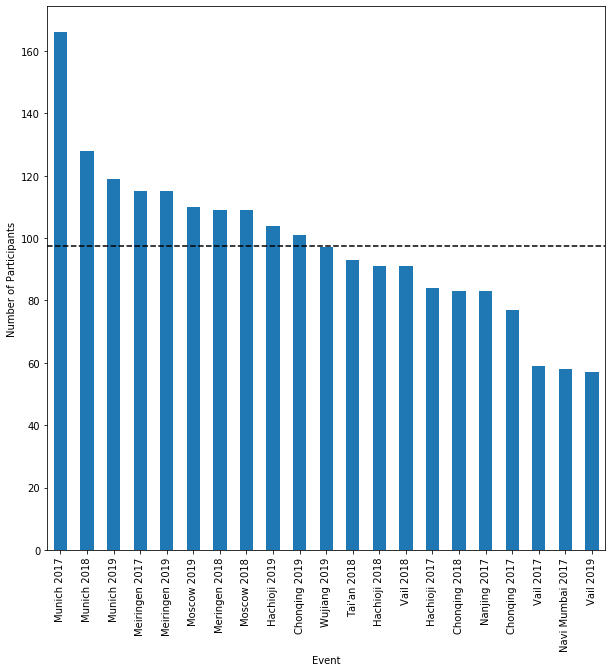

In [14]:
#Plotting the number of participants by event
plt.figure(figsize=(10,10))
df1['LocYear'].value_counts().plot(kind='bar')
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Participants')
plt.xlabel('Event')
plt.hlines(df1['LocYear'].value_counts().mean(), xmin = -0.5, xmax = 22, linestyles = "dashed", label = 'mean')

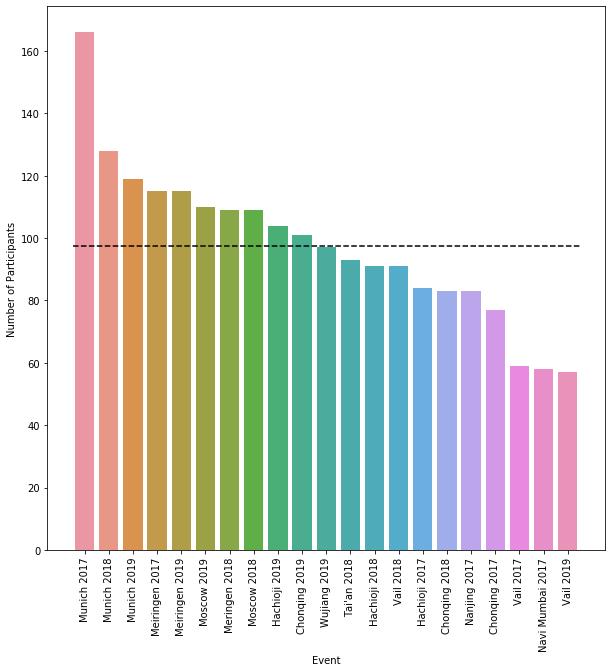

In [20]:
#Plotting the number of participants by event
plt.figure(figsize=(10,10))
sns.countplot(x='LocYear', data=df1, order = df1['LocYear'].value_counts().index)
plt.xticks(rotation = 'vertical')
plt.ylabel('Number of Participants')
plt.xlabel('Event')
plt.hlines(df1['LocYear'].value_counts().mean(), xmin = -0.5, xmax = 20.5, linestyles = "dashed", label = 'mean')

In [41]:
#Plotting the average number of competitors by location
df1.groupby(['Location','Year'])['NAME'].count().groupby(['Location']).mean()

Location
Chonqing        87.000000
Hachioji        93.000000
Meiringen      115.000000
Meringen       109.000000
Moscow         109.500000
Munich         137.666667
Nanjing         83.000000
Navi Mumbai     58.000000
Tai'an          93.000000
Vail            69.000000
Wujiang         97.000000
Name: NAME, dtype: float64

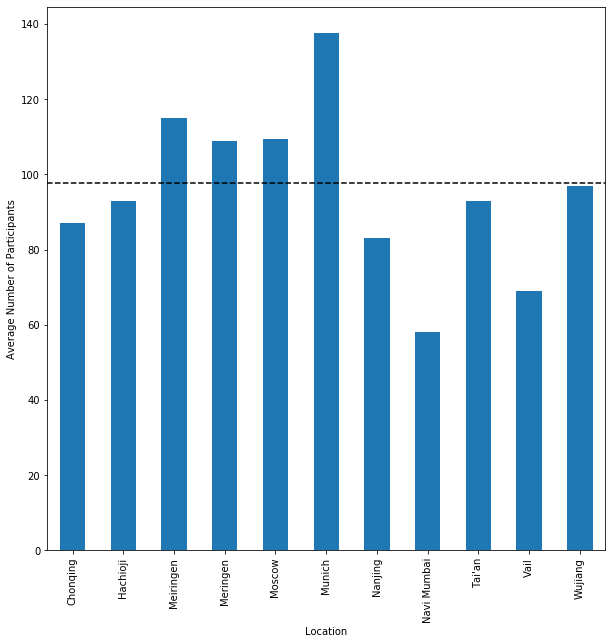

In [42]:
plt.figure(figsize=(10,10))
df1.groupby(['Location','Year'])['NAME'].count().groupby(['Location']).mean().plot(kind='bar')
plt.xticks(rotation = 'vertical')
plt.ylabel('Average Number of Participants')
plt.xlabel('Location')
plt.hlines(df1['LocYear'].value_counts().mean(), xmin = -0.5, xmax = 22, linestyles = "dashed", label = 'mean')

In [58]:
df2 = pd.DataFrame(df1.groupby(['Location','Year'])['NAME'].count().groupby(['Location']).mean()).reset_index()
df2

,Location,NAME
0,Chonqing,87.000000
1,Hachioji,93.000000
2,Meiringen,115.000000
3,Meringen,109.000000
4,Moscow,109.500000
5,Munich,137.666667
6,Nanjing,83.000000
7,Navi Mumbai,58.000000
8,Tai'an,93.000000
9,Vail,69.000000


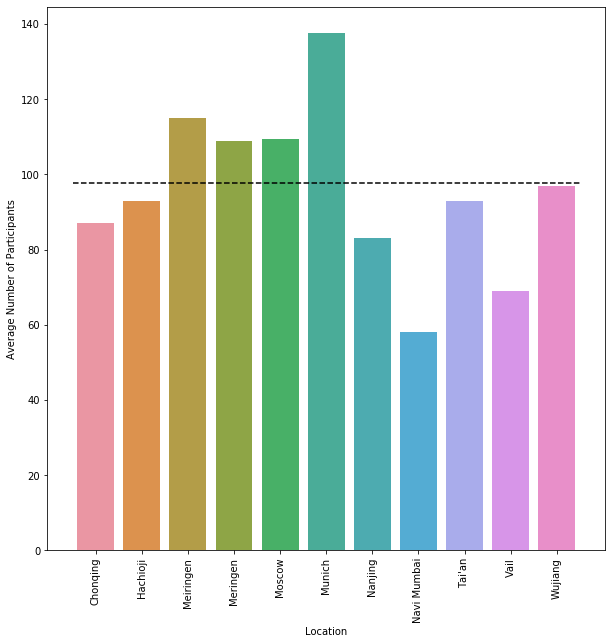

In [85]:
plt.figure(figsize=(10,10))
sns.barplot(x=df2['Location'], y=df2['NAME'])
plt.xticks(rotation = 'vertical')
plt.ylabel('Average Number of Participants')
plt.xlabel('Location')
plt.hlines(df1['LocYear'].value_counts().mean(), xmin = -0.5, xmax = 10.5, linestyles = "dashed", label = 'mean')

In [98]:
df['FULLNAME']=df['NAME'] + " " + df['SURNAME']

In [102]:
df3 = df.groupby('FULLNAME')['Rank'].mean().sort_values(ascending = True)[0:10].reset_index()
df3

,FULLNAME,Rank
0,TOMOA NARASAKI,4.631579
1,ADAM ONDRA,5.000000
2,JONGWON CHON,6.263158
3,ALEKSEI RUBTSOV,7.052632
4,KOKORO FUJII,7.900000
5,REI SUGIMOTO,8.263158
6,JERNEJ KRUDER,11.666667
7,YOSHIYUKI OGATA,12.714286
8,JAN HOJER,12.950000
9,REI KAWAMATA,13.666667


Text(0.5, 0, 'Athelete')

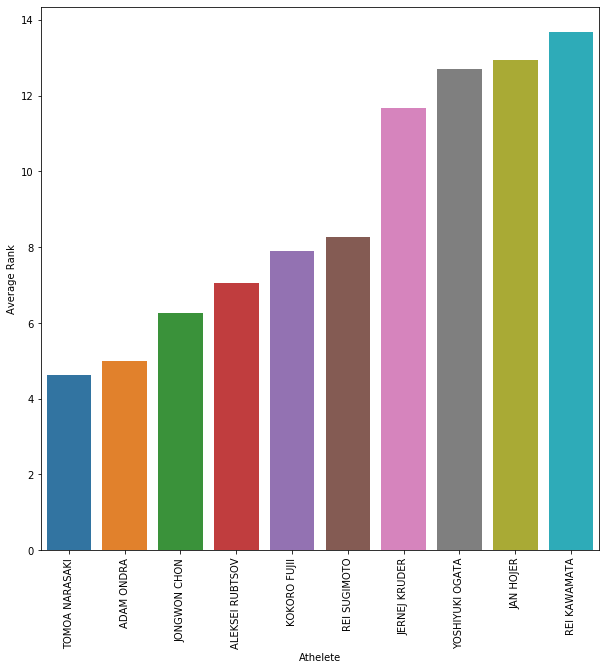

In [103]:
plt.figure(figsize = (10,10))
sns.barplot(x=df3['FULLNAME'], y=df3['Rank'])
plt.xticks(rotation = 'vertical')
plt.ylabel('Average Rank')
plt.xlabel('Athelete')

In [105]:
df4 = df.groupby('FULLNAME')['Rank'].mean().sort_values(ascending = True)
df[df['FULLNAME'] == 'JAN HOJER']

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME
21,Meiringen,2019,21,JAN,HOJER,GER,4T5Z 4 8,NaN,NaN,Meiringen 2019,JAN HOJER
126,Moscow,2019,12,JAN,HOJER,GER,4T5Z 5 7,1T4Z 2 9,NaN,Moscow 2019,JAN HOJER
236,Chonqing,2019,12,JAN,HOJER,GER,5T5Z 13 11,0T3Z 0 5,NaN,Chonqing 2019,JAN HOJER
331,Wujiang,2019,6,JAN,HOJER,GER,5T5Z 8 5,2T3Z 3 4,1T3Z 9 11,Wujiang 2019,JAN HOJER
425,Munich,2019,3,JAN,HOJER,GER,4T5Z 9 8,3T4Z 4 5,2T4Z 4 14,Munich 2019,JAN HOJER
545,Vail,2019,4,JAN,HOJER,GER,3T4Z 5 5,4T4Z 11 6,2T4Z 4 6,Vail 2019,JAN HOJER
609,Hachioji,2019,11,JAN,HOJER,GER,2T5Z 9 14,0T4Z 0 10,NaN,Hachioji 2019,JAN HOJER
720,Meringen,2018,18,JAN,HOJER,GER,3T3Z 3 3,1T1Z 2 1,NaN,Meringen 2018,JAN HOJER
847,Moscow,2018,35,JAN,HOJER,GER,3T4Z 5 7,NaN,NaN,Moscow 2018,JAN HOJER
925,Chonqing,2018,5,JAN,HOJER,GER,3T4Z 6 6,3T4Z 3 4,1T3Z 1 3,Chonqing 2018,JAN HOJER


In [109]:
df5 = df[~df['Qualification'].isnull()]
df5['Qualification'].str.replace(' ','0')
df['QualiTops'] = df5['Qualification'].str[0].astype(int)
df.head()

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z 7 6,4T4Z 10 9,4T4Z 10 9,Meiringen 2019,ADAM ONDRA,5
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z 7 6,3T4Z 3 4,3T3Z 7 6,Meiringen 2019,TOMOA NARASAKI,5
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z 8 8,3T4Z 12 12,2T3Z 6 7,Meiringen 2019,REI SUGIMOTO,5
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z 7 7,2T4Z 3 11,1T3Z 3 5,Meiringen 2019,KOKORO FUJII,5
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z 10 9,2T4Z 5 9,1T3Z 3 8,Meiringen 2019,JONGWON CHON,5


In [110]:
df[df['QualiTops'] == 0]

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops
95,Meiringen,2019,95,THOMAS,SALAKENOS,BEL,0T3Z 0 13,NaN,NaN,Meiringen 2019,THOMAS SALAKENOS,0
96,Meiringen,2019,97,ARNAUD,ANSION,BEL,0T2Z 0 2,NaN,NaN,Meiringen 2019,ARNAUD ANSION,0
99,Meiringen,2019,99,OR,MINIELY,ISR,0T2Z 0 3,NaN,NaN,Meiringen 2019,OR MINIELY,0
101,Meiringen,2019,101,ALEKSANDR,SHIKOV,RUS,0T2Z 0 7,NaN,NaN,Meiringen 2019,ALEKSANDR SHIKOV,0
103,Meiringen,2019,103,TOMI,SALO,FIN,0T2Z 0 10,NaN,NaN,Meiringen 2019,TOMI SALO,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2044,Munich,2017,152,SERGII,KARPIN,UKR,0T 0B,NaN,NaN,Munich 2017,SERGII KARPIN,0
2045,Munich,2017,152,VILKS,KASPARS,LAT,0T 0B,NaN,NaN,Munich 2017,VILKS KASPARS,0
2046,Munich,2017,152,NED,MIDDLEHURST,AUS,0T 0B,NaN,NaN,Munich 2017,NED MIDDLEHURST,0
2047,Munich,2017,152,MILOS,NEMY,SVK,0T 0B,NaN,NaN,Munich 2017,MILOS NEMY,0


In [111]:
df['Qualification'] = df['Qualification'].str.replace(' ', '')
df.head()

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z 10 9,4T4Z 10 9,Meiringen 2019,ADAM ONDRA,5
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z 3 4,3T3Z 7 6,Meiringen 2019,TOMOA NARASAKI,5
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z88,3T4Z 12 12,2T3Z 6 7,Meiringen 2019,REI SUGIMOTO,5
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z77,2T4Z 3 11,1T3Z 3 5,Meiringen 2019,KOKORO FUJII,5
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z109,2T4Z 5 9,1T3Z 3 8,Meiringen 2019,JONGWON CHON,5


In [112]:
df['QualiZones'] = df['Qualification'].str[2].astype(int)
df.head()

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z 10 9,4T4Z 10 9,Meiringen 2019,ADAM ONDRA,5,5
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z 3 4,3T3Z 7 6,Meiringen 2019,TOMOA NARASAKI,5,5
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z88,3T4Z 12 12,2T3Z 6 7,Meiringen 2019,REI SUGIMOTO,5,5
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z77,2T4Z 3 11,1T3Z 3 5,Meiringen 2019,KOKORO FUJII,5,5
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z109,2T4Z 5 9,1T3Z 3 8,Meiringen 2019,JONGWON CHON,5,5


In [114]:
df['Semi-Final'] = df['Semi-Final'].str.replace(' ', '')
df['Final'] = df['Final'].str.replace(' ', '')
df

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z34,3T3Z76,Meiringen 2019,TOMOA NARASAKI,5,5
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z88,3T4Z1212,2T3Z67,Meiringen 2019,REI SUGIMOTO,5,5
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z77,2T4Z311,1T3Z35,Meiringen 2019,KOKORO FUJII,5,5
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z109,2T4Z59,1T3Z38,Meiringen 2019,JONGWON CHON,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,Munich,2017,152,SERGII,KARPIN,UKR,0T0B,NaN,NaN,Munich 2017,SERGII KARPIN,0,0
2045,Munich,2017,152,VILKS,KASPARS,LAT,0T0B,NaN,NaN,Munich 2017,VILKS KASPARS,0,0
2046,Munich,2017,152,NED,MIDDLEHURST,AUS,0T0B,NaN,NaN,Munich 2017,NED MIDDLEHURST,0,0
2047,Munich,2017,152,MILOS,NEMY,SVK,0T0B,NaN,NaN,Munich 2017,MILOS NEMY,0,0


In [117]:
df5 = df[~df['Semi-Final'].isnull()]
df['SemiTops'] = df5['Semi-Final'].str[0].astype(int)
df['SemiZones'] = df5['Semi-Final'].str[2].astype(int)
df

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5,4.0,4.0
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z34,3T3Z76,Meiringen 2019,TOMOA NARASAKI,5,5,3.0,4.0
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z88,3T4Z1212,2T3Z67,Meiringen 2019,REI SUGIMOTO,5,5,3.0,4.0
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z77,2T4Z311,1T3Z35,Meiringen 2019,KOKORO FUJII,5,5,2.0,4.0
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z109,2T4Z59,1T3Z38,Meiringen 2019,JONGWON CHON,5,5,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,Munich,2017,152,SERGII,KARPIN,UKR,0T0B,NaN,NaN,Munich 2017,SERGII KARPIN,0,0,NaN,NaN
2045,Munich,2017,152,VILKS,KASPARS,LAT,0T0B,NaN,NaN,Munich 2017,VILKS KASPARS,0,0,NaN,NaN
2046,Munich,2017,152,NED,MIDDLEHURST,AUS,0T0B,NaN,NaN,Munich 2017,NED MIDDLEHURST,0,0,NaN,NaN
2047,Munich,2017,152,MILOS,NEMY,SVK,0T0B,NaN,NaN,Munich 2017,MILOS NEMY,0,0,NaN,NaN


In [118]:
df5 = df[~df['Final'].isnull()]
df['FinalTops'] = df5['Final'].str[0].astype(int)
df['FinalZones'] = df5['Final'].str[2].astype(int)
df

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5,4.0,4.0,4.0,4.0
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z34,3T3Z76,Meiringen 2019,TOMOA NARASAKI,5,5,3.0,4.0,3.0,3.0
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z88,3T4Z1212,2T3Z67,Meiringen 2019,REI SUGIMOTO,5,5,3.0,4.0,2.0,3.0
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z77,2T4Z311,1T3Z35,Meiringen 2019,KOKORO FUJII,5,5,2.0,4.0,1.0,3.0
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z109,2T4Z59,1T3Z38,Meiringen 2019,JONGWON CHON,5,5,2.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,Munich,2017,152,SERGII,KARPIN,UKR,0T0B,NaN,NaN,Munich 2017,SERGII KARPIN,0,0,NaN,NaN,NaN,NaN
2045,Munich,2017,152,VILKS,KASPARS,LAT,0T0B,NaN,NaN,Munich 2017,VILKS KASPARS,0,0,NaN,NaN,NaN,NaN
2046,Munich,2017,152,NED,MIDDLEHURST,AUS,0T0B,NaN,NaN,Munich 2017,NED MIDDLEHURST,0,0,NaN,NaN,NaN,NaN
2047,Munich,2017,152,MILOS,NEMY,SVK,0T0B,NaN,NaN,Munich 2017,MILOS NEMY,0,0,NaN,NaN,NaN,NaN


Text(0.5, 0, 'Athelete')

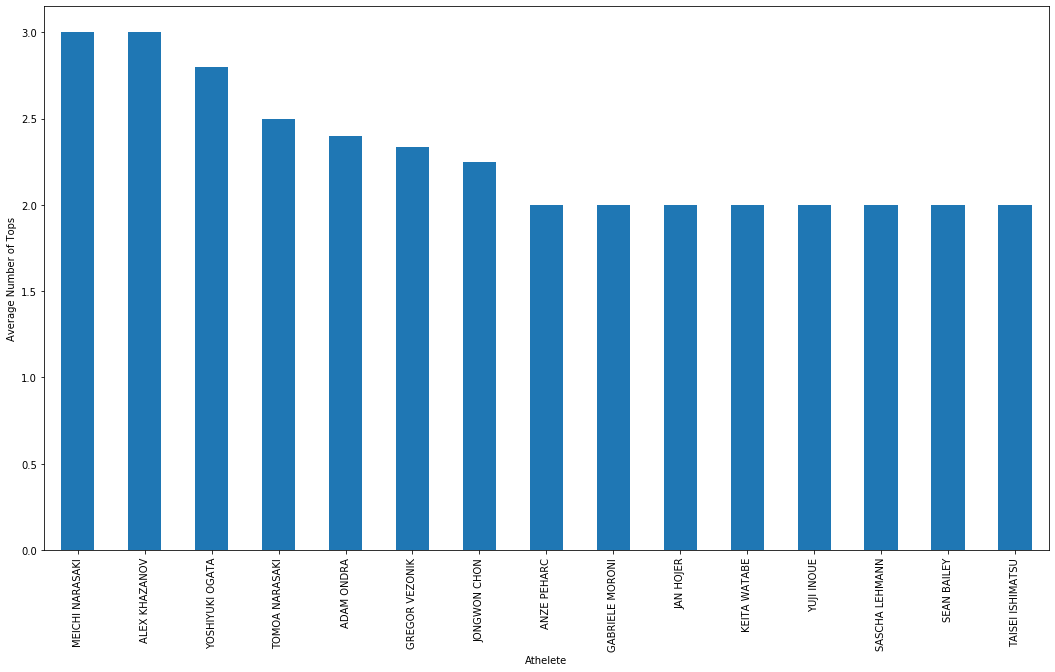

In [173]:
plt.figure(figsize = (18,10))
df5 = df[~df['Final'].isnull()]
df5.groupby('FULLNAME')['FinalTops'].mean().sort_values(ascending = False)[0:15].plot(kind = 'bar')
plt.ylabel('Average Number of Tops')
plt.xlabel('Athelete')

Text(0.5, 0, 'Athelete')

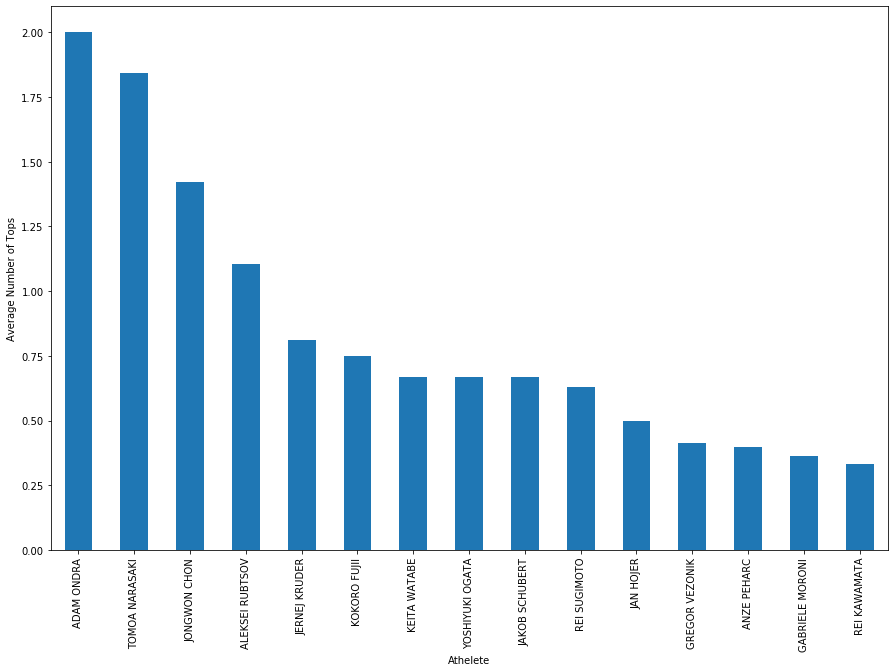

In [170]:
df2['FinalTops'] = df2['FinalTops'].replace(np.nan,0)
plt.figure(figsize = (15,10))
df2.groupby('FULLNAME')['FinalTops'].mean().sort_values(ascending = False)[0:15].plot(kind = 'bar')
plt.ylabel('Average Number of Tops')
plt.xlabel('Athelete')

Text(0.5, 0, 'Athelete')

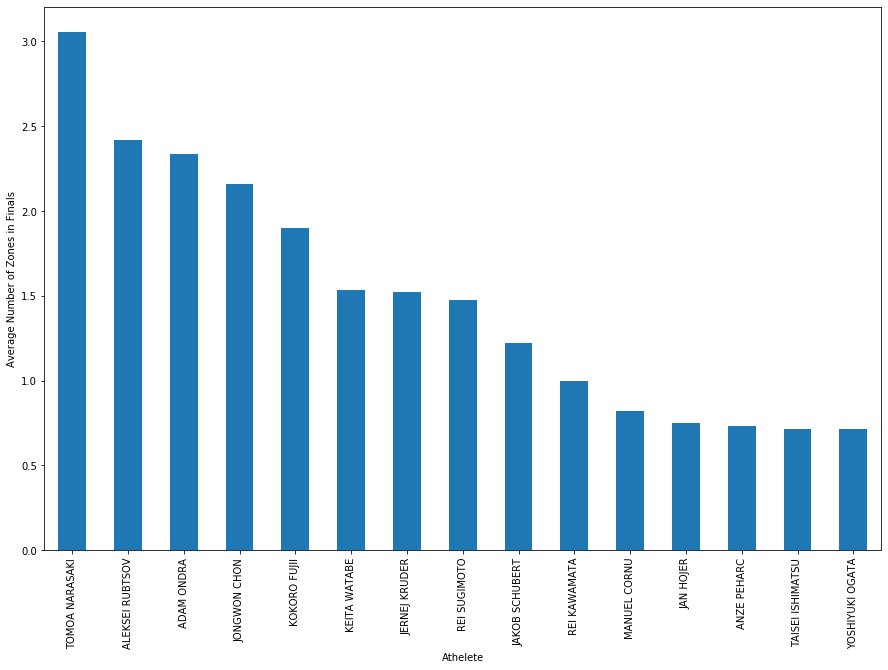

In [169]:
df2['FinalZones'] = df2['FinalZones'].replace(np.nan,0)
plt.figure(figsize = (15,10))
df2.groupby('FULLNAME')['FinalZones'].mean().sort_values(ascending = False)[0:15].plot(kind = 'bar')
plt.ylabel('Average Number of Zones in Finals')
plt.xlabel('Athelete')

Text(0.5, 0, 'Athelete')

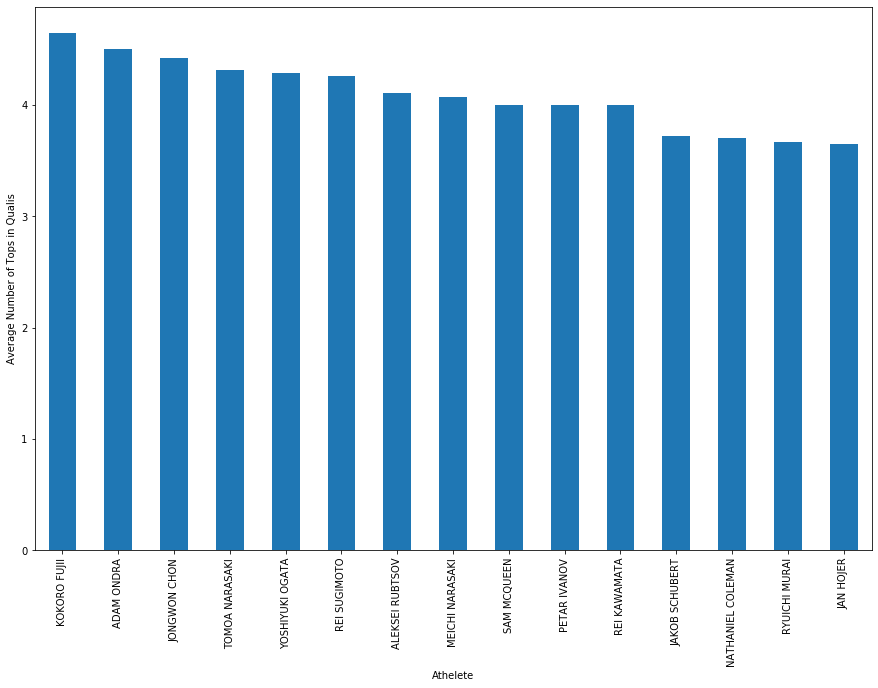

In [151]:
df2['QualiTops'] = df2['QualiTops'].replace(np.nan,0)
plt.figure(figsize = (15,10))
df2.groupby('FULLNAME')['QualiTops'].mean().sort_values(ascending = False)[0:15].plot(kind = 'bar')
plt.ylabel('Average Number of Tops in Qualis')
plt.xlabel('Athelete')

In [177]:
df5 = df[~df['Final'].isnull()]
df5

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5,4.0,4.0,4.0,4.0
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z34,3T3Z76,Meiringen 2019,TOMOA NARASAKI,5,5,3.0,4.0,3.0,3.0
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z88,3T4Z1212,2T3Z67,Meiringen 2019,REI SUGIMOTO,5,5,3.0,4.0,2.0,3.0
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z77,2T4Z311,1T3Z35,Meiringen 2019,KOKORO FUJII,5,5,2.0,4.0,1.0,3.0
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z109,2T4Z59,1T3Z38,Meiringen 2019,JONGWON CHON,5,5,2.0,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,Munich,2017,2,TOMOA,NARASAKI,JPN,4T75B7,3T54B6,3T63B3,Munich 2017,TOMOA NARASAKI,4,7,3.0,5.0,3.0,6.0
1885,Munich,2017,3,TAISEI,ISHIMATSU,JPN,4T105B11,3T44B5,3T73B4,Munich 2017,TAISEI ISHIMATSU,4,1,3.0,4.0,3.0,7.0
1886,Munich,2017,4,JONGWON,CHON,KOR,5T75B7,4T64B6,2T33B4,Munich 2017,JONGWON CHON,5,7,4.0,6.0,2.0,3.0
1887,Munich,2017,5,YOSHIYUKI,OGATA,JPN,5T85B8,3T73B7,2T43B4,Munich 2017,YOSHIYUKI OGATA,5,8,3.0,7.0,2.0,4.0


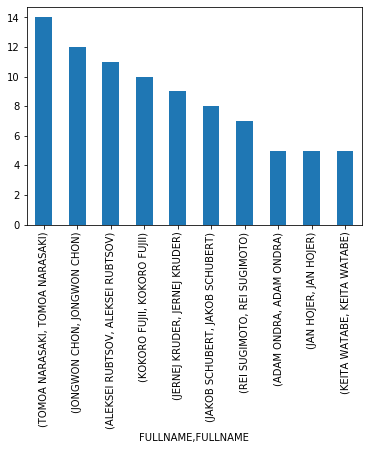

In [178]:
df5.groupby('FULLNAME')['FULLNAME'].value_counts().sort_values(ascending = False)[0:10].plot(kind = 'bar')

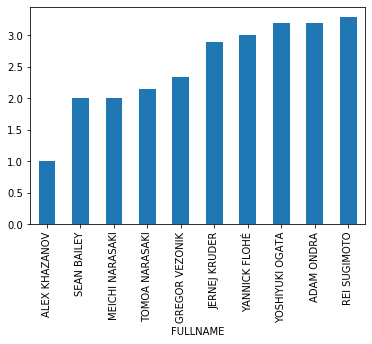

In [180]:
df5.groupby('FULLNAME')['Rank'].mean().sort_values(ascending = True)[0:10].plot(kind = 'bar')

In [181]:
df.head()

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5,4.0,4.0,4.0,4.0
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z34,3T3Z76,Meiringen 2019,TOMOA NARASAKI,5,5,3.0,4.0,3.0,3.0
2,Meiringen,2019,3,REI,SUGIMOTO,JPN,5T5Z88,3T4Z1212,2T3Z67,Meiringen 2019,REI SUGIMOTO,5,5,3.0,4.0,2.0,3.0
3,Meiringen,2019,4,KOKORO,FUJII,JPN,5T5Z77,2T4Z311,1T3Z35,Meiringen 2019,KOKORO FUJII,5,5,2.0,4.0,1.0,3.0
4,Meiringen,2019,5,JONGWON,CHON,KOR,5T5Z109,2T4Z59,1T3Z38,Meiringen 2019,JONGWON CHON,5,5,2.0,4.0,1.0,3.0


In [206]:
dfA = df['FULLNAME'].value_counts().reset_index()
dfA.columns = ['FULLNAME','Entries']
dfA

,FULLNAME,Entries
0,YOSHIYUKI OGATA,21
1,JERNEJ KRUDER,21
2,ALEX KHAZANOV,20
3,KOKORO FUJII,20
4,JAN HOJER,20
...,...,...
490,YUTA IMAIZUMI,1
491,WILL JOHNSON,1
492,ZIDA MA,1
493,AYODELE SOPEJU,1


In [207]:
dfB = pd.merge(df, dfA)
dfB

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones,Entries
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5,4.0,4.0,4.0,4.0,6
1,Moscow,2019,2,ADAM,ONDRA,CZE,3T5Z812,4T4Z96,3T4Z57,Moscow 2019,ADAM ONDRA,3,5,4.0,4.0,3.0,4.0,6
2,Wujiang,2019,14,ADAM,ONDRA,CZE,5T5Z76,0T3Z03,NaN,Wujiang 2019,ADAM ONDRA,5,5,0.0,3.0,0.0,0.0,6
3,Munich,2019,2,ADAM,ONDRA,CZE,4T5Z1011,4T4Z88,3T3Z33,Munich 2019,ADAM ONDRA,4,5,4.0,4.0,3.0,3.0,6
4,Vail,2019,5,ADAM,ONDRA,CZE,5T5Z99,4T4Z1413,2T3Z34,Vail 2019,ADAM ONDRA,5,5,4.0,4.0,2.0,3.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,Munich,2017,152,VIKTOR,TRPOVSKI,MKD,0T0B,NaN,NaN,Munich 2017,VIKTOR TRPOVSKI,0,0,0.0,NaN,0.0,0.0,1
2045,Munich,2017,152,SANTIAGO,CHRISTENSEN,ARG,0T0B,NaN,NaN,Munich 2017,SANTIAGO CHRISTENSEN,0,0,0.0,NaN,0.0,0.0,1
2046,Munich,2017,152,SERGII,KARPIN,UKR,0T0B,NaN,NaN,Munich 2017,SERGII KARPIN,0,0,0.0,NaN,0.0,0.0,1
2047,Munich,2017,152,VILKS,KASPARS,LAT,0T0B,NaN,NaN,Munich 2017,VILKS KASPARS,0,0,0.0,NaN,0.0,0.0,1


In [215]:
dfB[~(dfB['Entries'] < 3)].groupby('FULLNAME')['QualiTops'].mean().sort_values(ascending = False)[0:10]

FULLNAME
KOKORO FUJII       4.650000
ADAM ONDRA         4.500000
JONGWON CHON       4.421053
TOMOA NARASAKI     4.315789
YOSHIYUKI OGATA    4.285714
REI SUGIMOTO       4.263158
ALEKSEI RUBTSOV    4.105263
MEICHI NARASAKI    4.076923
REI KAWAMATA       4.000000
JAKOB SCHUBERT     3.722222
Name: QualiTops, dtype: float64

Text(0, 0.5, 'Mean Tops in Qualifications')

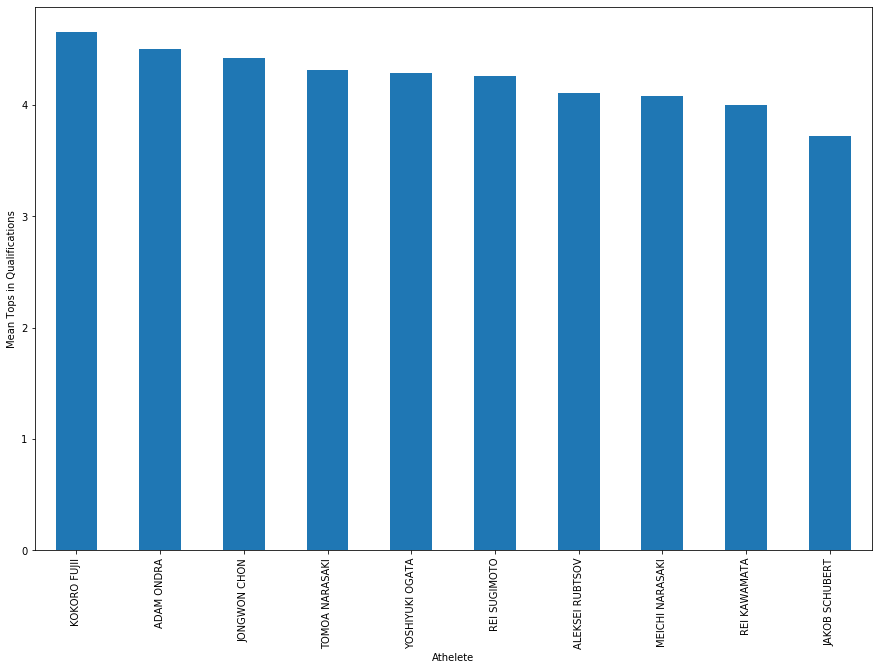

In [219]:
plt.figure(figsize=(15,10))
dfB[~(dfB['Entries'] < 3)].groupby('FULLNAME')['QualiTops'].mean().sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.xlabel('Athelete')
plt.ylabel('Mean Tops in Qualifications')

Text(0, 0.5, 'Mean Zones in Qualifications')

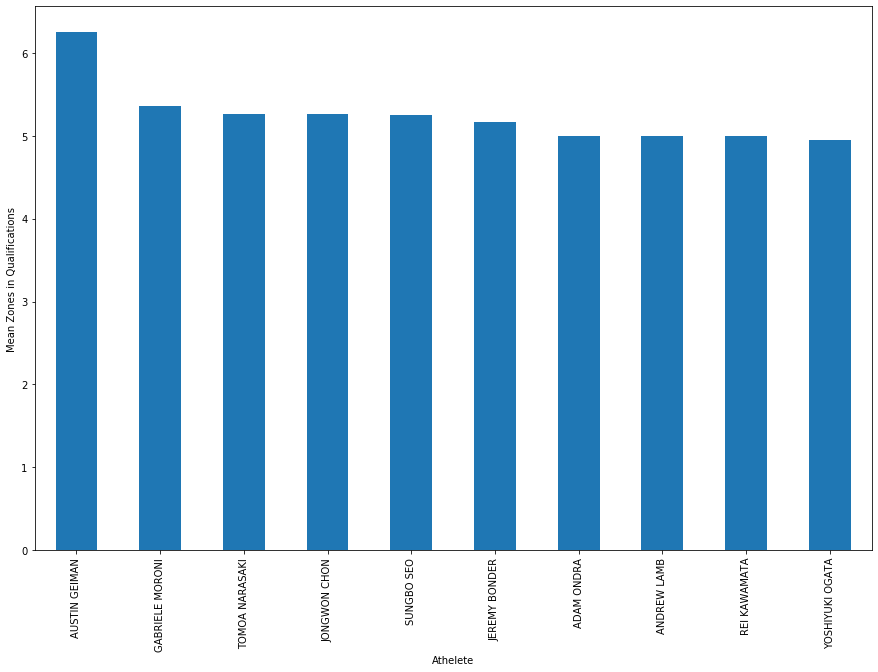

In [221]:
plt.figure(figsize=(15,10))
dfB[~(dfB['Entries'] < 3)].groupby('FULLNAME')['QualiZones'].mean().sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.xlabel('Athelete')
plt.ylabel('Mean Zones in Qualifications')

Text(0, 0.5, 'Mean Tops in Semis')

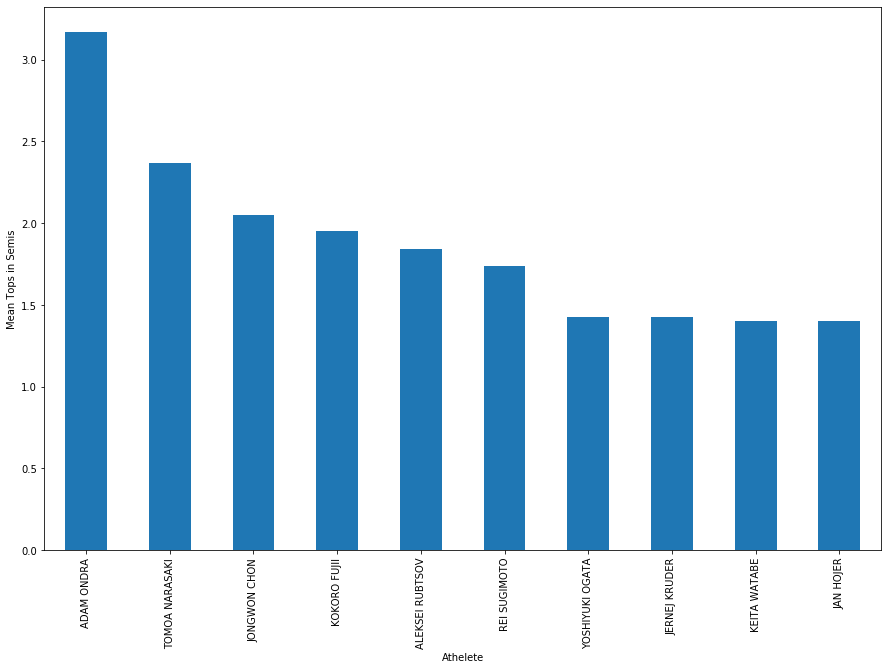

In [223]:
plt.figure(figsize=(15,10))
dfB[~(dfB['Entries'] < 3)].groupby('FULLNAME')['SemiTops'].mean().sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.xlabel('Athelete')
plt.ylabel('Mean Tops in Semis')

Text(0, 0.5, 'Mean Zones in Semis')

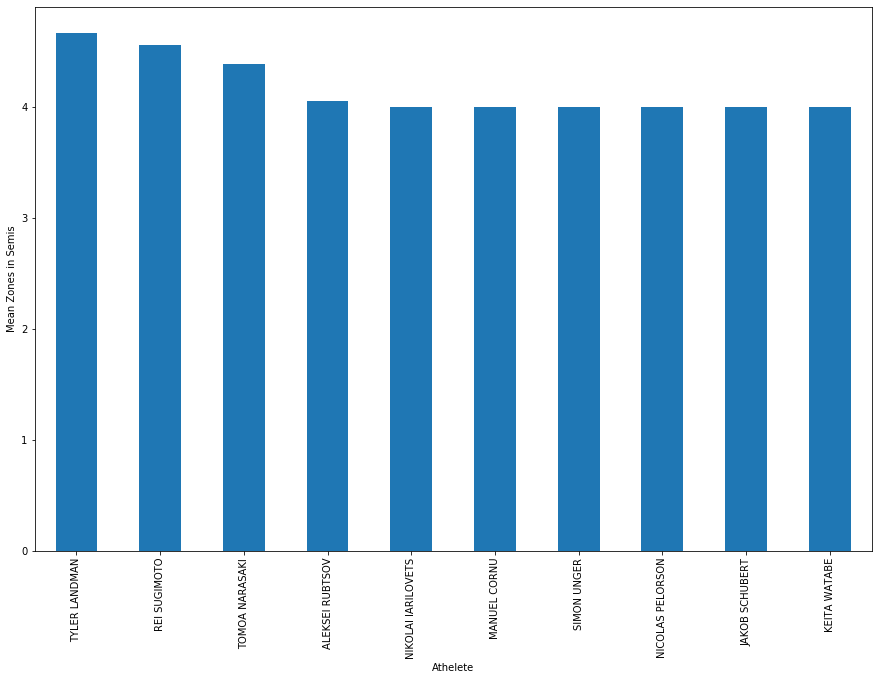

In [227]:
plt.figure(figsize=(15,10))
dfB[(dfB['Entries'] >= 4)].groupby('FULLNAME')['SemiZones'].mean().sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.xlabel('Athelete')
plt.ylabel('Mean Zones in Semis')

Text(0, 0.5, 'Mean Zones in Finals')

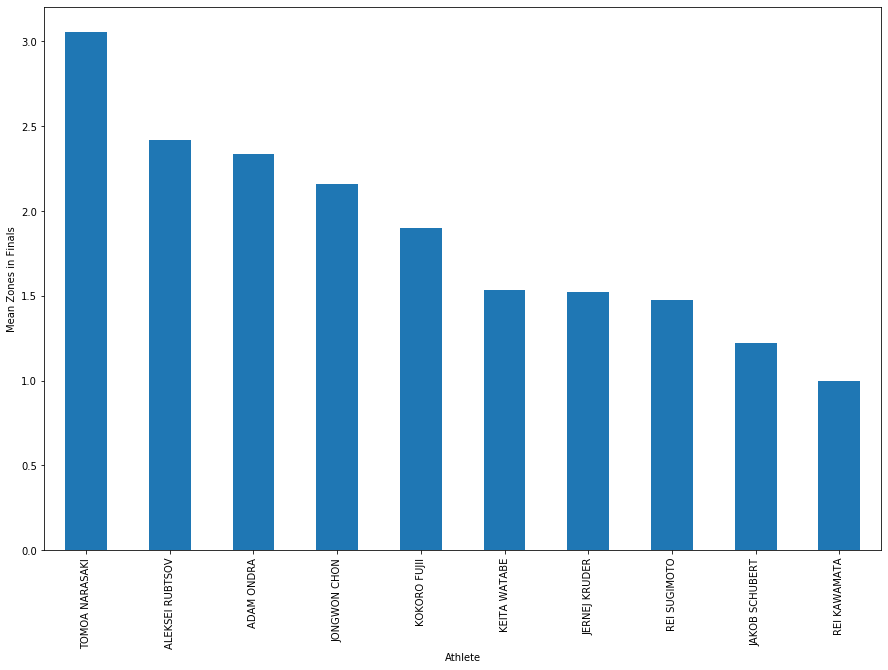

In [229]:
plt.figure(figsize=(15,10))
dfB[~(dfB['Entries'] < 3)].groupby('FULLNAME')['FinalZones'].mean().sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.xlabel('Athlete')
plt.ylabel('Mean Zones in Finals')

Text(0, 0.5, 'Mean Tops in Finals')

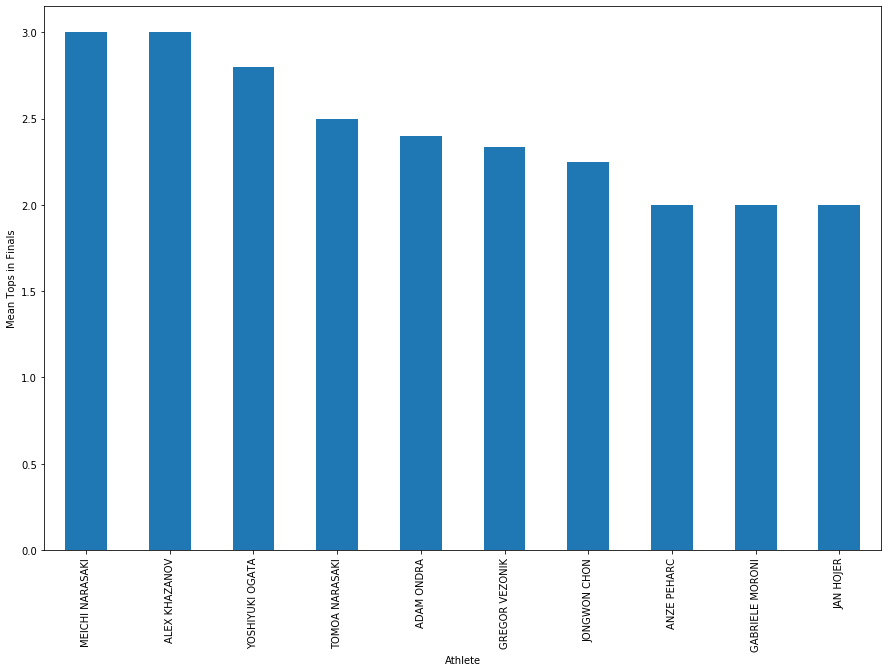

In [235]:
plt.figure(figsize=(15,10))
dfB = dfB[~dfB['Final'].isnull()]
dfB[~(dfB['Entries'] < 6)].groupby('FULLNAME')['FinalTops'].mean().sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.xlabel('Athlete')
plt.ylabel('Mean Tops in Finals')

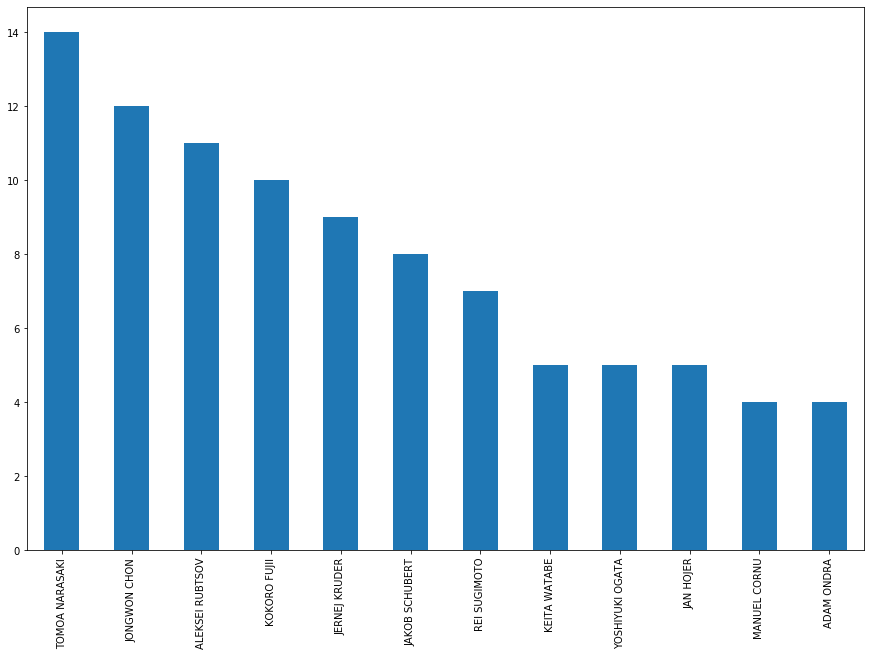

In [250]:
plt.figure(figsize=(15,10))
df[~(df['FinalZones'] == 0)]['FULLNAME'].value_counts()[0:12].plot(kind='bar')


In [254]:
dfC = df[~(df['FinalZones'] == 0)]['FULLNAME'].value_counts().reset_index()
dfC.columns = ['FULLNAME','FinalsCount']
dfC

,FULLNAME,FinalsCount
0,TOMOA NARASAKI,14
1,JONGWON CHON,12
2,ALEKSEI RUBTSOV,11
3,KOKORO FUJII,10
4,JERNEJ KRUDER,9
5,JAKOB SCHUBERT,8
6,REI SUGIMOTO,7
7,KEITA WATABE,5
8,YOSHIYUKI OGATA,5
9,JAN HOJER,5


In [259]:
dfD = pd.merge(dfB, dfC, how = 'left', on='FULLNAME')
dfD

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones,Entries,FinalsCount
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5,4.0,4.0,4.0,4.0,6,4
1,Moscow,2019,2,ADAM,ONDRA,CZE,3T5Z812,4T4Z96,3T4Z57,Moscow 2019,ADAM ONDRA,3,5,4.0,4.0,3.0,4.0,6,4
2,Munich,2019,2,ADAM,ONDRA,CZE,4T5Z1011,4T4Z88,3T3Z33,Munich 2019,ADAM ONDRA,4,5,4.0,4.0,3.0,3.0,6,4
3,Vail,2019,5,ADAM,ONDRA,CZE,5T5Z99,4T4Z1413,2T3Z34,Vail 2019,ADAM ONDRA,5,5,4.0,4.0,2.0,3.0,6,4
4,Hachioji,2019,6,ADAM,ONDRA,CZE,5T5Z66,3T4Z117,0T0Z00,Hachioji 2019,ADAM ONDRA,5,5,3.0,4.0,0.0,0.0,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Hachioji,2017,3,KEITA,WATABE,JPN,4T55B7,4T134B6,2T53B6,Hachioji 2017,KEITA WATABE,4,5,4.0,1.0,2.0,5.0,15,5
123,Vail,2017,6,KEITA,WATABE,JPN,4T65B7,2T32B3,1T31B3,Vail 2017,KEITA WATABE,4,6,2.0,3.0,1.0,3.0,15,5
124,Moscow,2018,6,GABRIELE,MORONI,ITA,5T5Z76,3T3Z33,2T3Z714,Moscow 2018,GABRIELE MORONI,5,5,3.0,3.0,2.0,3.0,11,2
125,Hachioji,2018,1,GABRIELE,MORONI,ITA,2T4Z26,3T4Z56,2T4Z36,Hachioji 2018,GABRIELE MORONI,2,4,3.0,4.0,2.0,4.0,11,2


In [265]:
dfD['Entries'].astype(int)
dfD['FinalsCount'].astype(int)

0      4
1      4
2      4
3      4
4      4
      ..
122    5
123    5
124    2
125    2
126    1
Name: FinalsCount, Length: 127, dtype: int64

In [269]:
dfD['SuccessRate'] = (dfD['FinalsCount']/dfD['Entries'])*100
dfD

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones,Entries,FinalsCount,SuccessRate
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5,4.0,4.0,4.0,4.0,6,4,66.666667
1,Moscow,2019,2,ADAM,ONDRA,CZE,3T5Z812,4T4Z96,3T4Z57,Moscow 2019,ADAM ONDRA,3,5,4.0,4.0,3.0,4.0,6,4,66.666667
2,Munich,2019,2,ADAM,ONDRA,CZE,4T5Z1011,4T4Z88,3T3Z33,Munich 2019,ADAM ONDRA,4,5,4.0,4.0,3.0,3.0,6,4,66.666667
3,Vail,2019,5,ADAM,ONDRA,CZE,5T5Z99,4T4Z1413,2T3Z34,Vail 2019,ADAM ONDRA,5,5,4.0,4.0,2.0,3.0,6,4,66.666667
4,Hachioji,2019,6,ADAM,ONDRA,CZE,5T5Z66,3T4Z117,0T0Z00,Hachioji 2019,ADAM ONDRA,5,5,3.0,4.0,0.0,0.0,6,4,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Hachioji,2017,3,KEITA,WATABE,JPN,4T55B7,4T134B6,2T53B6,Hachioji 2017,KEITA WATABE,4,5,4.0,1.0,2.0,5.0,15,5,33.333333
123,Vail,2017,6,KEITA,WATABE,JPN,4T65B7,2T32B3,1T31B3,Vail 2017,KEITA WATABE,4,6,2.0,3.0,1.0,3.0,15,5,33.333333
124,Moscow,2018,6,GABRIELE,MORONI,ITA,5T5Z76,3T3Z33,2T3Z714,Moscow 2018,GABRIELE MORONI,5,5,3.0,3.0,2.0,3.0,11,2,18.181818
125,Hachioji,2018,1,GABRIELE,MORONI,ITA,2T4Z26,3T4Z56,2T4Z36,Hachioji 2018,GABRIELE MORONI,2,4,3.0,4.0,2.0,4.0,11,2,18.181818


Text(0, 0.5, 'Success Rate (%)')

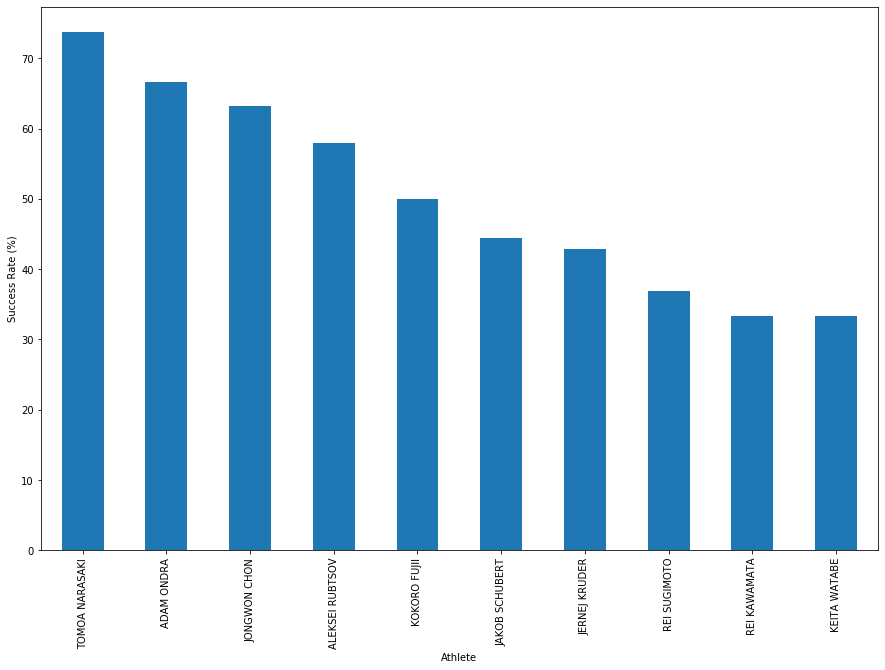

In [285]:
plt.figure(figsize=(15,10))
dfD.groupby('FULLNAME')['SuccessRate'].mean().sort_values(ascending = False)[0:10].plot(kind = 'bar')
plt.xlabel('Athlete')
plt.ylabel('Success Rate (%)')

In [283]:
df[df['FULLNAME'] == 'TOMOA NARASAKI']

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones
1,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z34,3T3Z76,Meiringen 2019,TOMOA NARASAKI,5,5,3.0,4.0,3.0,3.0
226,Chonqing,2019,2,TOMOA,NARASAKI,JPN,5T5Z65,2T3Z1111,3T4Z56,Chonqing 2019,TOMOA NARASAKI,5,5,2.0,3.0,3.0,4.0
326,Wujiang,2019,1,TOMOA,NARASAKI,JPN,5T5Z87,3T4Z135,3T4Z78,Wujiang 2019,TOMOA NARASAKI,5,5,3.0,4.0,3.0,4.0
543,Vail,2019,2,TOMOA,NARASAKI,JPN,5T5Z1311,4T4Z125,3T4Z55,Vail 2019,TOMOA NARASAKI,5,5,4.0,4.0,3.0,4.0
599,Hachioji,2019,1,TOMOA,NARASAKI,JPN,4T4Z85,2T4Z24,2T4Z1220,Hachioji 2019,TOMOA NARASAKI,4,4,2.0,4.0,2.0,4.0
704,Meringen,2018,2,TOMOA,NARASAKI,JPN,3T4Z54,3T3Z77,2T4Z37,Meringen 2018,TOMOA NARASAKI,3,4,3.0,3.0,2.0,4.0
812,Moscow,2018,1,TOMOA,NARASAKI,JPN,4T5Z79,3T3Z55,4T4Z1212,Moscow 2018,TOMOA NARASAKI,4,5,3.0,3.0,4.0,4.0
931,Chonqing,2018,11,TOMOA,NARASAKI,JPN,5T5Z1210,1T3Z26,NaN,Chonqing 2018,TOMOA NARASAKI,5,5,1.0,3.0,0.0,0.0
1011,Tai'an,2018,8,TOMOA,NARASAKI,JPN,4T5Z59,3T3Z33,NaN,Tai'an 2018,TOMOA NARASAKI,4,5,3.0,3.0,0.0,0.0
1098,Hachioji,2018,2,TOMOA,NARASAKI,JPN,4T4Z138,3T4Z57,1T3Z16,Hachioji 2018,TOMOA NARASAKI,4,4,3.0,4.0,1.0,3.0


In [284]:
dfD[dfD['FULLNAME'] == 'TOMOA NARASAKI']

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones,Entries,FinalsCount,SuccessRate
5,Meiringen,2019,2,TOMOA,NARASAKI,JPN,5T5Z76,3T4Z34,3T3Z76,Meiringen 2019,TOMOA NARASAKI,5,5,3.0,4.0,3.0,3.0,19,14,73.684211
6,Chonqing,2019,2,TOMOA,NARASAKI,JPN,5T5Z65,2T3Z1111,3T4Z56,Chonqing 2019,TOMOA NARASAKI,5,5,2.0,3.0,3.0,4.0,19,14,73.684211
7,Wujiang,2019,1,TOMOA,NARASAKI,JPN,5T5Z87,3T4Z135,3T4Z78,Wujiang 2019,TOMOA NARASAKI,5,5,3.0,4.0,3.0,4.0,19,14,73.684211
8,Vail,2019,2,TOMOA,NARASAKI,JPN,5T5Z1311,4T4Z125,3T4Z55,Vail 2019,TOMOA NARASAKI,5,5,4.0,4.0,3.0,4.0,19,14,73.684211
9,Hachioji,2019,1,TOMOA,NARASAKI,JPN,4T4Z85,2T4Z24,2T4Z1220,Hachioji 2019,TOMOA NARASAKI,4,4,2.0,4.0,2.0,4.0,19,14,73.684211
10,Meringen,2018,2,TOMOA,NARASAKI,JPN,3T4Z54,3T3Z77,2T4Z37,Meringen 2018,TOMOA NARASAKI,3,4,3.0,3.0,2.0,4.0,19,14,73.684211
11,Moscow,2018,1,TOMOA,NARASAKI,JPN,4T5Z79,3T3Z55,4T4Z1212,Moscow 2018,TOMOA NARASAKI,4,5,3.0,3.0,4.0,4.0,19,14,73.684211
12,Hachioji,2018,2,TOMOA,NARASAKI,JPN,4T4Z138,3T4Z57,1T3Z16,Hachioji 2018,TOMOA NARASAKI,4,4,3.0,4.0,1.0,3.0,19,14,73.684211
13,Vail,2018,3,TOMOA,NARASAKI,JPN,4T5Z45,2T4Z45,2T4Z35,Vail 2018,TOMOA NARASAKI,4,5,2.0,4.0,2.0,4.0,19,14,73.684211
14,Chonqing,2017,2,TOMOA,NARASAKI,JPN,5T75B6,2T63B5,2T23B3,Chonqing 2017,TOMOA NARASAKI,5,7,2.0,6.0,2.0,2.0,19,14,73.684211


In [305]:
dfD

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,FULLNAME,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones,Entries,FinalsCount,SuccessRate
0,Meiringen,2019,1,ADAM,ONDRA,CZE,5T5Z76,4T4Z109,4T4Z109,Meiringen 2019,ADAM ONDRA,5,5,4.0,4.0,4.0,4.0,6,4,66.666667
1,Moscow,2019,2,ADAM,ONDRA,CZE,3T5Z812,4T4Z96,3T4Z57,Moscow 2019,ADAM ONDRA,3,5,4.0,4.0,3.0,4.0,6,4,66.666667
2,Munich,2019,2,ADAM,ONDRA,CZE,4T5Z1011,4T4Z88,3T3Z33,Munich 2019,ADAM ONDRA,4,5,4.0,4.0,3.0,3.0,6,4,66.666667
3,Vail,2019,5,ADAM,ONDRA,CZE,5T5Z99,4T4Z1413,2T3Z34,Vail 2019,ADAM ONDRA,5,5,4.0,4.0,2.0,3.0,6,4,66.666667
4,Hachioji,2019,6,ADAM,ONDRA,CZE,5T5Z66,3T4Z117,0T0Z00,Hachioji 2019,ADAM ONDRA,5,5,3.0,4.0,0.0,0.0,6,4,66.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,Hachioji,2017,3,KEITA,WATABE,JPN,4T55B7,4T134B6,2T53B6,Hachioji 2017,KEITA WATABE,4,5,4.0,1.0,2.0,5.0,15,5,33.333333
123,Vail,2017,6,KEITA,WATABE,JPN,4T65B7,2T32B3,1T31B3,Vail 2017,KEITA WATABE,4,6,2.0,3.0,1.0,3.0,15,5,33.333333
124,Moscow,2018,6,GABRIELE,MORONI,ITA,5T5Z76,3T3Z33,2T3Z714,Moscow 2018,GABRIELE MORONI,5,5,3.0,3.0,2.0,3.0,11,2,18.181818
125,Hachioji,2018,1,GABRIELE,MORONI,ITA,2T4Z26,3T4Z56,2T4Z36,Hachioji 2018,GABRIELE MORONI,2,4,3.0,4.0,2.0,4.0,11,2,18.181818


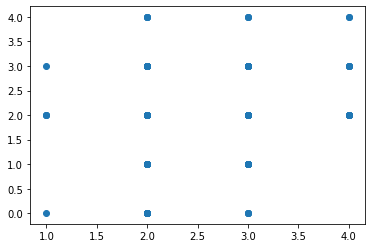

In [306]:
plt.scatter(dfD['SemiTops'],dfD['FinalTops'])

In [332]:
from sklearn.linear_model import LinearRegression
X = dfD['SemiTops'].values.reshape(-1,1)  # values converts it into a numpy array
Y = dfD['FinalTops']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

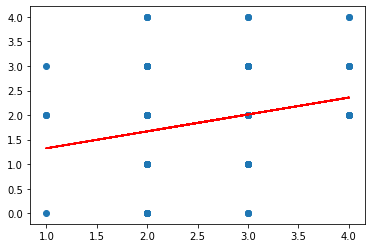

In [333]:
plt.scatter(dfD['SemiTops'],dfD['FinalTops'])
plt.plot(X, Y_pred, color='red')
plt.show()

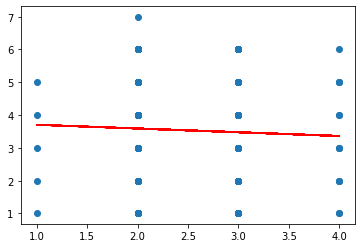

In [334]:
from sklearn.linear_model import LinearRegression
X = dfD['SemiTops'].values.reshape(-1,1)  # values converts it into a numpy array
Y = dfD['Rank']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(dfD['SemiTops'],dfD['Rank'])
plt.plot(X, Y_pred, color='red')
plt.show()

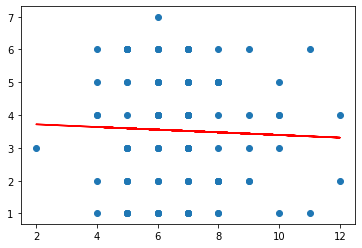

In [337]:
dfD['Test'] = dfD['SemiTops']+dfD['SemiZones']

from sklearn.linear_model import LinearRegression
X = dfD['Test'].values.reshape(-1,1)  # values converts it into a numpy array
Y = dfD['Rank']
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X,Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(dfD['Test'],dfD['Rank'])
plt.plot(X, Y_pred, color='red')
plt.show()

In [348]:
dfD[dfD['Test'] >= 9]

,Location,Year,Rank,NAME,SURNAME,Nation,Qualification,Semi-Final,Final,LocYear,...,QualiTops,QualiZones,SemiTops,SemiZones,FinalTops,FinalZones,Entries,FinalsCount,SuccessRate,Test
15,Nanjing,2017,2,TOMOA,NARASAKI,JPN,5T75B7,2T74B10,3T64B7,Nanjing 2017,...,5,7,2.0,7.0,3.0,6.0,19,14,73.684211,9.0
17,Navi Mumbai,2017,6,TOMOA,NARASAKI,JPN,5T75B6,2T74B7,1T12B2,Navi Mumbai 2017,...,5,7,2.0,7.0,1.0,1.0,19,14,73.684211,9.0
23,Meiringen,2017,4,REI,SUGIMOTO,JPN,5T165B8,3T74B7,1T53B7,Meiringen 2017,...,5,1,3.0,7.0,1.0,5.0,19,7,36.842105,10.0
25,Navi Mumbai,2017,2,REI,SUGIMOTO,JPN,3T84B9,2T73B5,3T63B4,Navi Mumbai 2017,...,3,8,2.0,7.0,3.0,6.0,19,7,36.842105,9.0
47,Munich,2017,4,JONGWON,CHON,KOR,5T75B7,4T64B6,2T33B4,Munich 2017,...,5,7,4.0,6.0,2.0,3.0,19,12,63.157895,10.0
57,Meiringen,2017,2,ALEKSEI,RUBTSOV,RUS,5T85B8,3T94B5,1T22B8,Meiringen 2017,...,5,8,3.0,9.0,1.0,2.0,19,11,57.894737,12.0
60,Vail,2017,4,ALEKSEI,RUBTSOV,RUS,3T44B9,3T93B6,2T53B8,Vail 2017,...,3,4,3.0,9.0,2.0,5.0,19,11,57.894737,12.0
61,Navi Mumbai,2017,3,ALEKSEI,RUBTSOV,RUS,5T115B9,2T83B7,3T93B8,Navi Mumbai 2017,...,5,1,2.0,8.0,3.0,9.0,19,11,57.894737,10.0
66,Munich,2017,5,YOSHIYUKI,OGATA,JPN,5T85B8,3T73B7,2T43B4,Munich 2017,...,5,8,3.0,7.0,2.0,4.0,21,5,23.809524,10.0
94,Munich,2017,1,JAN,HOJER,GER,5T115B9,3T74B12,4T104B6,Munich 2017,...,5,1,3.0,7.0,4.0,1.0,20,5,25.000000,10.0
